# 0. Basics
Imports & basic functions

In [2]:
### IMPORTS
import numpy as np
import scipy as sp
import pandas as pd
# Download market data from Yahoo finance
import yfinance as yf
# Solving convex optimization problems
import cvxpy as cp
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec  # Create a custom grid

plt.rcParams.update({
    'figure.figsize': (10, 6),           # Default figure size
    'axes.titlesize': 18,                # Title font size
    'axes.labelsize': 14,                # Axis label font size
    'xtick.labelsize': 12,               # X-tick label font size
    'ytick.labelsize': 12,               # Y-tick label font size
    'legend.fontsize': 12,               # Legend font size

    'axes.grid': True,                   # Enable grid
    'grid.color': '0.9',                 # Grid color
    'grid.linestyle': '--',              # Grid line style
    'grid.linewidth': 0.5,               # Grid line width

    'lines.linewidth': 2,                # Line width
    'lines.markersize': 6,               # Marker size

    'axes.spines.top': False,            # Turn off top spine
    'axes.spines.right': False,          # Turn off right spine
    'axes.spines.left': True,            # Turn on left spine
    'axes.spines.bottom': True,          # Turn on bottom spine
    'axes.edgecolor': '0.8',             # Axis edge color
    'axes.linewidth': 1,                 # Axis line width
    'axes.facecolor': 'white',           # Axis face color
    'savefig.bbox': 'tight'              # Save figure with tight bounding box
})

In [3]:
### BASIC FUNCTIONS
def Download(assets, start_date, end_date):
    dataframe = yf.download(assets, start=start_date, end=end_date)['Adj Close']
    return dataframe.dropna()

LogRet = lambda data : np.log( 1 + data.pct_change() ).dropna()

# 1. Assets & Correlation
Asset categories & their correlation

### 1.1. Chosen assets

**1. Traditional Assets:** Stability, benchmarking (standard reference for investments) & safe-havens (activo refugio) :

*   S&P 500: Benchmark for the US stock market. Represents a broad measure of the US stock market (500 of the largest companies),
*   Bonds: Often considered a safe-haven asset, US Treasury Bonds, for instance, provide a counterbalance to the riskier equities, since their backed by the US government,
*   Gold: Historically seen as a hedge against inflation and economic uncertainty, gold often has low or negative correlations with stocks and bonds.

**2. Cryptocurrencies:** High Risk, High Reward & Innovation
Cryptocurrencies offer high potential returns but come with the price of a high volatility. They also provide exposure to a new financial technology: blockchain.
*   This category includes famous cryptos (Bitcoin, Ethereum),
*   As well as smaller coins to provide diversification (Binance Coin, Cardano etc).


**3. Technology Stocks:** Innovation & Growth
Technology stocks represent companies at the forefront of innovation and technological advancements. They offer significant growth potential and are often leaders in their respective industries.

**4. Various Sectors:** Diversification Across Industries
Stocks from various sectors provide diversification across different industries, reducing sector-specific risks. These sectors include:

*   Telecommunications (AT&T, Verizon),
*   Consumer goods (Nike, Starbucks, Procter & Gamble, Coca-Cola),
*   Retail, sale of goods and services to consumers (Walmart),
*   Energy (Exxon Mobil),
*   Pharmaceutical (Johnson & Johnson, Pfizer),
*   Aerospace (Boeing),
*   Industrials (3M, General Electric).

**5. Spanish Stocks:** Geographical Diversification
Spanish stocks provides exposure to a different market from the European market. This category includes companies from various sectors such as:
*   Telecommunications (Telefónica),
*   Retail (Inditex, DÍA),
*   Energy (Iberdrola),
*   Automotive (CIE Automotive),
*   Banking (Banco Santander, CaixaBank),
*   Infrastructure (Ferrovial).

In [4]:
###Period
start = '2020-01-01'
end   = '2024-01-01'
today = '2024-06-01'

### TICKERS

# Fetching traditional asset
#              S&P 500, US Treasury Bond, Gold
traditional = ['^GSPC', 'IEF', 'GLD']
trad_data = Download(traditional, start, end)
trad_data.name = 'Traditional'

# Fetching cryptocurrency
#          Bitcoin,   Ethereum,  Binance Coin,Cardano, Ripple,    Litecoin,  Chainlink
cryptos = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'ADA-USD', 'XRP-USD', 'LTC-USD', 'LINK-USD']
crypto_data = Download(cryptos, start, end)
crypto_data.name = 'Crypto'

small_crypto_data = crypto_data.drop(columns=['BTC-USD'])
small_crypto_data.name = 'Smaller Cryptos'

# Fetching technologies
#        Apple, Micrsft, Amazon, Tesla,  Google,  Meta,   NVIDIA, Netflix, Adobe, PayPal, Intel, Advanced Micro Devices
techs = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'GOOGL', 'META', 'NVDA', 'NFLX', 'ADBE', 'PYPL', 'INTC', 'AMD']
tech_data = Download(techs, start, end)
tech_data.name = 'Tech'

# Fetching various sectors
#       AT&T, Verizon, Nike, Starbucks, P&G, Coca-Cola, Walmart, Exxon Mobil, Johnson & Johnson, Pfizer, Boeing, 3M, General Electric
various = ['T', 'VZ', 'NKE', 'SBUX', 'PG', 'KO', 'WMT', 'XOM', 'JNJ', 'PFE', 'BA', 'MMM', 'GE']
vars_data = Download(various, start, end)
vars_data.name = 'Vars'

# Tickers: Telefónica, Inditex, CIE Automotive, DÍA, Banco Santander, CaixaBank, Ferrovial, Iberdrola
ibex = ['TEF.MC', 'ITX.MC', 'CIE.MC', 'DIA.MC', 'SAN.MC', 'CABK.MC', 'FER.MC', 'IBE.MC']
ibex_data = Download(ibex, start, end)
ibex_data.name = 'IBEX'

# All Stock prices data
all_tickers = traditional + cryptos + techs + various + ibex
all_data = pd.concat([trad_data, crypto_data, tech_data, vars_data, ibex_data], axis=1).dropna()
all_data.name = 'Portfolio w/ cryptos'

# All prices except cryptos
nall_data = pd.concat([trad_data, tech_data, vars_data, ibex_data], axis=1).dropna()
nall_data.name = 'Portfolio w/o cryptos'

### Future data
all_future_data = Download(all_tickers, end, today).dropna()
all_future_data.name = 'Portfolio w/ cryptos'

# Categories
future_trad_data = all_future_data[traditional]
future_trad_data.name = 'Traditional'
future_crypto_data = all_future_data[cryptos]
future_crypto_data.name = 'Crypto'
future_tech_data = all_future_data[techs]
future_tech_data.name = 'Tech'
future_vars_data = all_future_data[various]
future_vars_data.name = 'Vars'
future_ibex_data = all_future_data[ibex]
future_ibex_data.name = 'IBEX'

[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  12 of 12 completed
[*********************100%%**********************]  13 of 13 completed
[*********************100%%**********************]  8 of 8 completed
[*********************100%%**********************]  43 of 43 completed


### 1.2. Plotting Functions

In [5]:
### PLOTING FUNCTIONS
def plot_dataframes(data_list, title, logscale= False):
    # Create a figure
    fig, axes = plt.subplots(3,2, figsize=(10, 15))
    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot each DataFrame on a separate subplot
    for data, axi in zip (data_list, axes):
        data.plot( logy=logscale, ax=axi, title=data.name)
        axi.set_xlabel('')
    plt.suptitle(title, fontsize= 22)

def plot_matrix(corr_mat_df, title, annot= False):
    # Heatmap plot
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_mat_df, annot=annot, cmap='viridis')

    # Layout
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45, va='top')
    plt.xlabel(''); plt.ylabel('')
    plt.title(title)
    plt.grid(False)

def plot_hierarchical_tree(dist_mat, title):
    plt.figure(figsize=(30, 20))
    # Distance matrix to vector-form
    dist_vect = sp.spatial.distance.squareform(dist_mat)

    linkage_matrix = sp.cluster.hierarchy.linkage(dist_vect, method='ward', metric='euclidean')
    # Tree
    sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=dist_mat.columns)

    # Adding titles and labels
    plt.title(title, fontsize=30)
    plt.xlabel("Assets", fontsize=20)
    plt.ylabel("Distance", fontsize=20)

### 1.3. Plot assets & their correlation

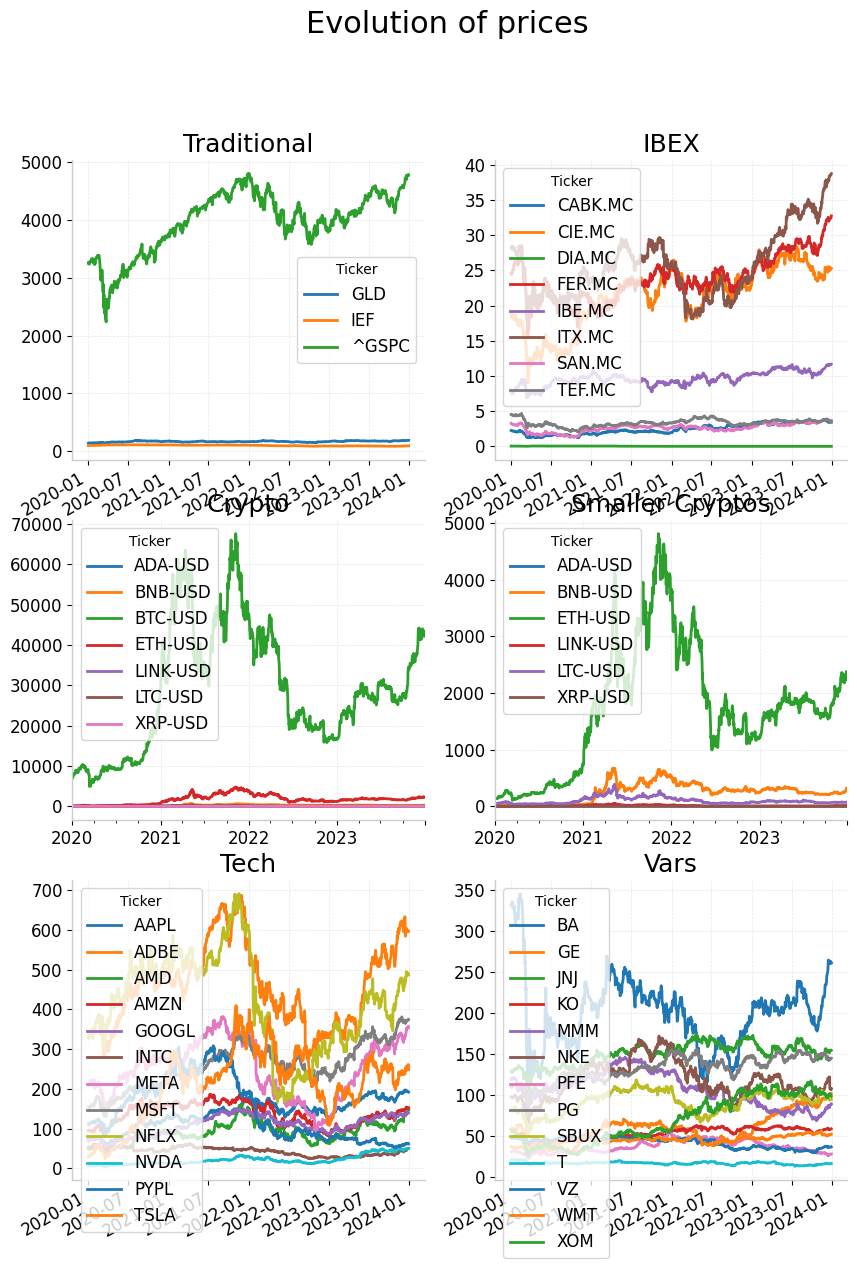

In [6]:
data_list = [trad_data, ibex_data, crypto_data, small_crypto_data, tech_data, vars_data]
plot_dataframes(data_list, title= 'Evolution of prices', logscale= False)

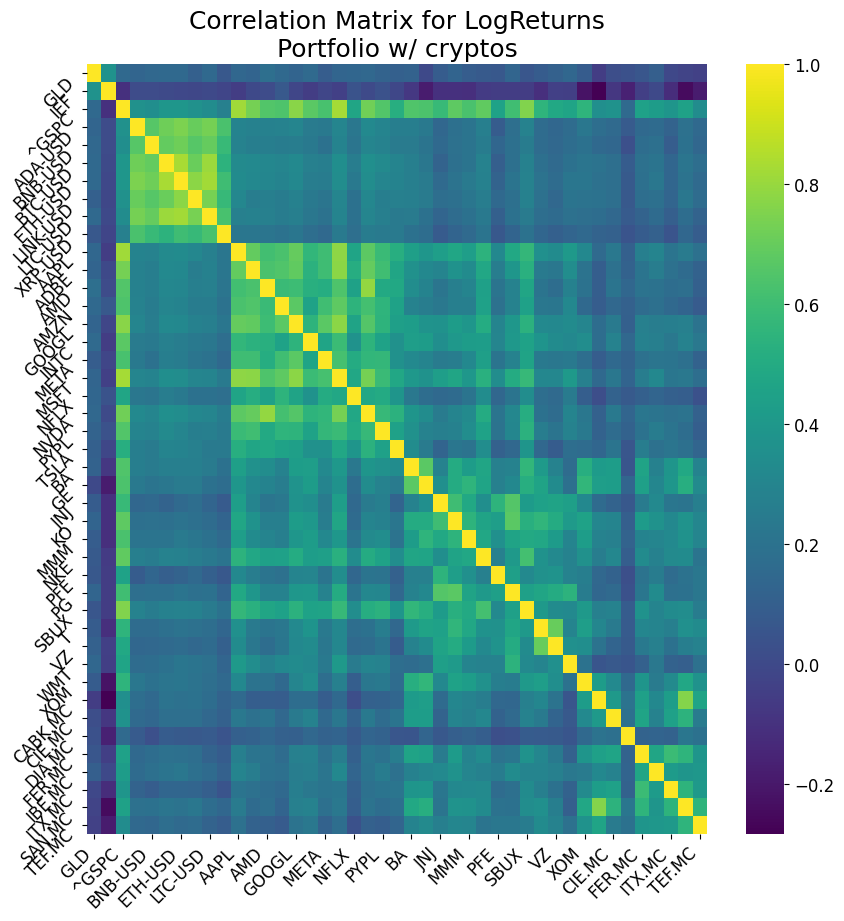

In [7]:
# Compute LogReturns
df_returns = LogRet(all_data)
# Compute correlation Matrix
corr_mat = df_returns.corr()

plot_matrix(corr_mat, 'Correlation Matrix for LogReturns' + '\n' + all_data.name, annot= False)

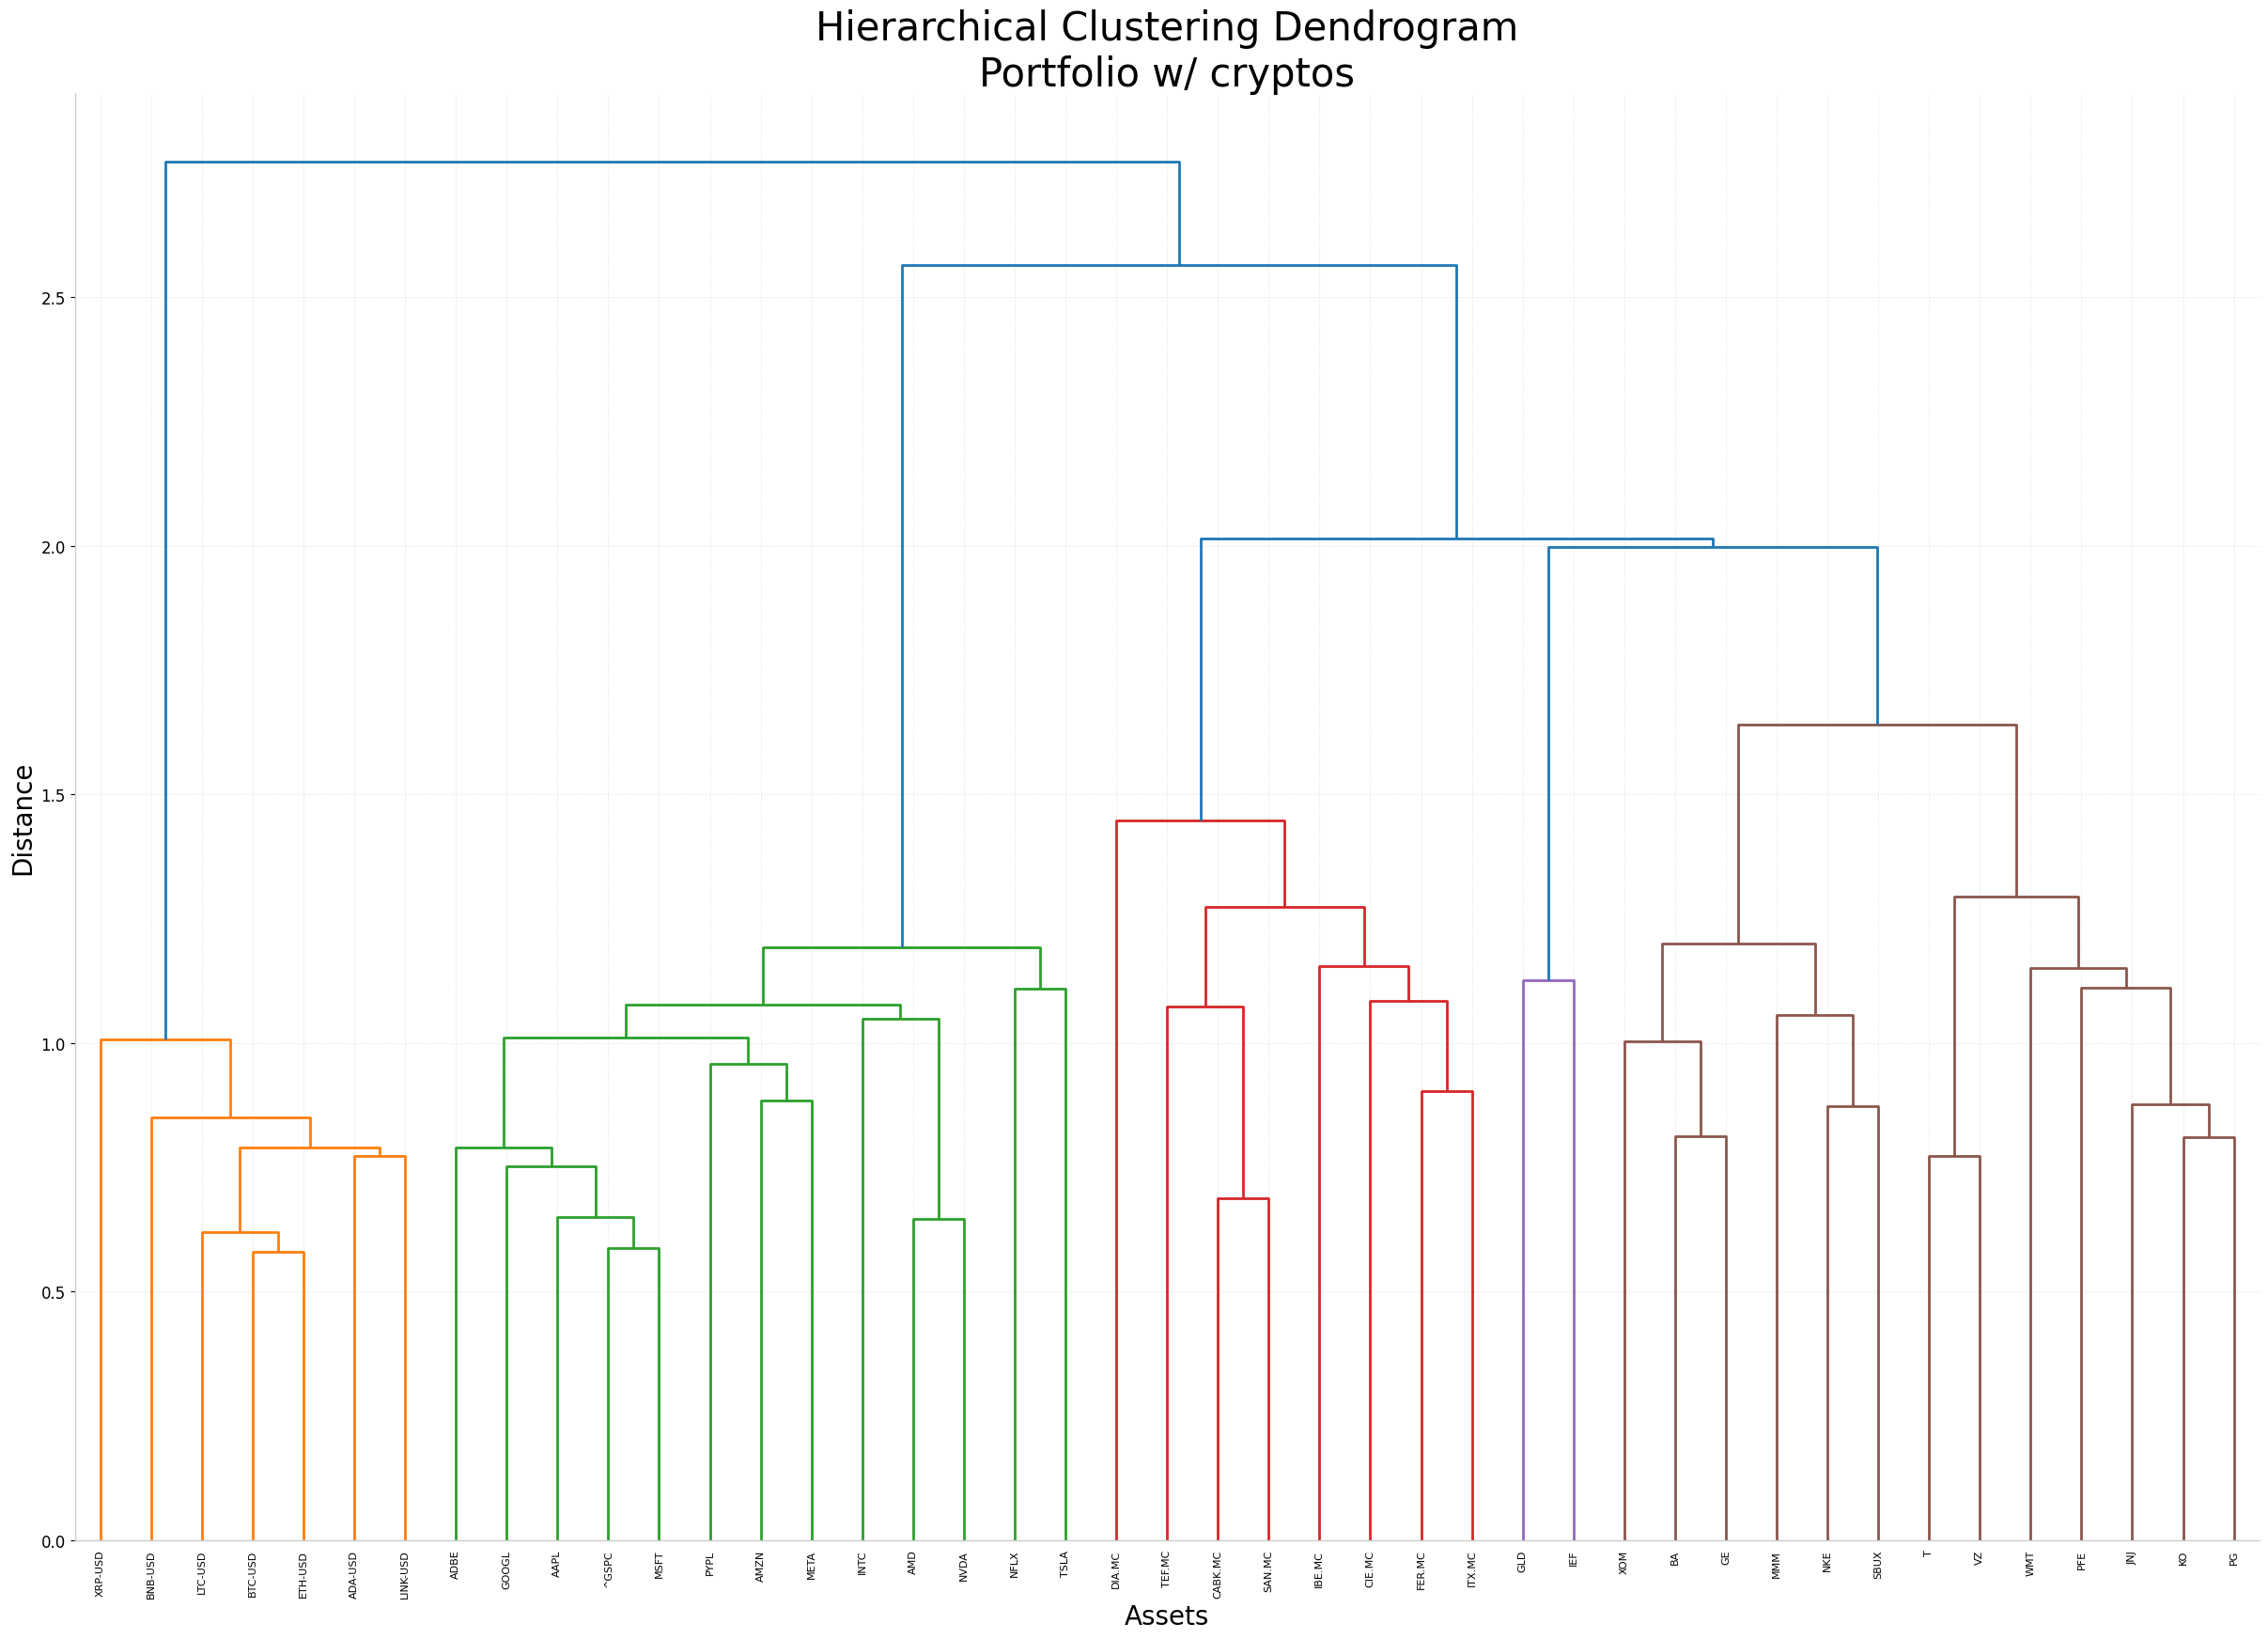

In [8]:
# Compute distance Matrix
dist_mat = np.sqrt(2 * (1 - corr_mat))

plot_hierarchical_tree(dist_mat, 'Hierarchical Clustering Dendrogram' + '\n' + all_data.name)

This clustering provides insights into the diversification and potential correlations between different asset classes, visualizing the diversification of the portfolio.

*   **Orange Cluster:** This cluster represents the cryptocurrencies sub-portfolio, they are correlated due to their high volatility and similar growth behavior.
*   **Green Cluster:** This cluster includes the technology assets and the S&P 500. But why are these specially correlated? At first inpression, since the S&P index represents the broader US stock market, it shouldn't be that correlated. But in todays context it is, technology stocks experience a significant growth due to a breakthrough in artificial intelligence. Specially for Nvidia firstly, Google and Microsoft.
*   **Red Cluster:** This cluster is more diverse, including the following subclusters: IBEX stocks, various american sectors, lastly, gold and bonds. The large spread indicates varying degrees of correlation, these assets are more correlated between them than with the cryptocoins and the technological asssets.


# 2. Modern Portfolio Teory

### 2.0. Portfolio Optimization Class

In [9]:
class PortfolioOptimization:
    def __init__(self, data):
        'Initialize the class given a prices DataFrame'
        self.name = data.name
        self.df = data
        self.df_ret = LogRet(data)
        self.df_ret.name = f'{self.name} LogRet'
        self.N = len(self.df.columns)               # Number of assets
        self.mu = self.df_ret.mean().to_numpy()     # Mean for each asset
        self.Sigma = self.df_ret.cov().to_numpy()   # Covariance matrix
        # Initialize variables in the cvxpy framework
        self.w = cp.Variable(self.N)                    # Weight vector
        self.risk_aversion = cp.Parameter(nonneg=True)  # Risk aversion: λ∈[0,1]

        # Setup the optimization problem
        self._setup_problem()
        # Compute the efficient frontier
        self.frontier_df, self.weights_mat = self._compute_eff_frontier()
        # Computes different weight vectors
        self.mean_weights     = self.mean_weights()
        self.max_SR_weights   = self.max_SR_weights()
        self.weighted_weights = self.weighted_weights()


    ###         INTERNAL USE FUNCTIONS

    def _setup_problem(self):
        'Sets up the optimization problem with the defined parameters and constraints'
        # Mean return and variance
        self.mean_P = self.mu.T @ self.w
        self.var_P = cp.quad_form(self.w, self.Sigma)
        # Function to maximize the portfolio return adjusted for risk
        self.expression = cp.Maximize(
            (1 - self.risk_aversion) * self.mean_P - self.risk_aversion * self.var_P
            )
        # Define the constraints (weights sum to 1, no short selling)
        self.constraints = [cp.sum(self.w) == 1, self.w >= 0]
        # Set up the optimization problem
        self.prob = cp.Problem(self.expression, self.constraints)

    def _compute_eff_frontier(self, N_ef=300):
        'Solves the portfolio optimization problem for a range of risk aversion values'
        'N_ef : Number of Efficient Frontier points'
        # Generate values for the risk aversion parameter : λ ∈ [0,1]
        lambdas = np.linspace(0, 1, N_ef)
        # Create a DataFrame to store the Efficient Frontier results
        frontier_df = pd.DataFrame(index=range(N_ef), columns=['Return', 'Risk', 'SR'])
        # Initiate weights matrix
        weights_mat = np.zeros((N_ef, self.N))

        # Compute the efficient frontier
        for i in range(N_ef):
            # Set the current value of the risk aversion parameter
            self.risk_aversion.value = lambdas[i]
            # Solve the optimization problem
            self.prob.solve()
            # Store the optimal annualized return, risk, and Sharpe ratio
            ret = self.mean_P.value * 252
            vol = np.sqrt(self.var_P.value * 252)
            SR  = ret / vol

            # Save the results in the frontier DataFrame
            frontier_df.loc[i, 'Return'] = ret
            frontier_df.loc[i, 'Risk'] = vol
            frontier_df.loc[i, 'SR'] = SR
            # Save the weights in the weights matrix
            weights_mat[i, :] = self.w.value

        return frontier_df, weights_mat


    ###         COMPUTE PORTFOLIO WEIGHTS

    def mean_weights(self):
        'Compute the mean weights from the weights matrix'
        return pd.Series(np.mean(self.weights_mat, axis=0),
                         index=self.df.columns,
                         name='Mean Weights')

    def max_SR_weights(self):
        'Finds the optimal weights for the portfolio based on maximum Sharpe ratio'
        # Ensure the 'SR' column is numeric
        SR = pd.to_numeric(self.frontier_df['SR'])
        # Extract the optimal weights for the maximum Sharpe ratio
        max_sharpe_idx = SR.idxmax()

        return pd.Series(self.weights_mat[max_sharpe_idx],
                        index=self.df.columns,
                        name=f'Max SR Weights ({self.name})')

    def weighted_weights(self):
        'Computes the weighted average of the portfolio where the weights are the Sharpe Ratio'
        # Ensure the 'SR' column is numeric
        SR = pd.to_numeric(self.frontier_df['SR'])
        # Calculate the weighted average weights
        weighted_avg = np.average(self.weights_mat, axis=0, weights=SR)
        return pd.Series(weighted_avg,
                         index=self.df.columns,
                         name=f'Weights Weighted by SR ({self.name})')

    def thresholded_weights(self, weights=None, threshold=0.01):
        'Normalize weights that are greater than a specified threshold.'
        # If no weights are given, take the ones weighted by the Sharpe Ratio
        weights = self.weighted_weights if weights is None else weights

        thresholded_weights = weights[weights > threshold]
        normalized_weights  = thresholded_weights / thresholded_weights.sum()
        return normalized_weights

    def compute_portfolio_relative_price(self, future_data, weights=None):
        'Computes the portfolio relative price using the provided weights'
        # Compute Future Returns
        future_returns = LogRet(future_data)
        # If no weights are given, take the ones weighted by the Sharpe Ratio
        weights = self.weighted_weights if weights is None else weights

        # Filter the returns DataFrame to include only the tickers in the weights index
        filtered_returns = future_returns[weights.index]
        # Matrix multiplication
        portfolio_returns = filtered_returns @ weights

        # Calculate price evolution for each company
        price_df = (1 + portfolio_returns).cumprod()
        # Normalise the price
        normalised_price = price_df / price_df.iloc[0]

        return pd.Series(normalised_price,
                         name=f'{self.name} Price')


    ###         PLOTTERS

    def plot_eff_frontier(self):
        df = self.frontier_df
        plt.figure()
        # Plot the efficient frontier
        scat = plt.scatter(df['Risk'], df['Return'], c=df['SR'],
                           cmap='viridis', s=75, label='Efficient Frontier')
        plt.colorbar(scat, label="Sharpe Ratio")
        # Plot individual stocks
        sigma_P = np.sqrt(np.diag(self.Sigma) * 252)
        mu_P = self.mu * 252
        plt.scatter(sigma_P, mu_P, color="k", s=100, label='Individual Stocks')
        # Annotate the plot with stock names
        for i in range(len(self.df.columns)):
            plt.text(sigma_P[i], mu_P[i] - 0.08, self.df.columns.values[i],
                     size='small', ha='center', va='bottom')
        # Add title and labels
        plt.title("Efficient Frontier & Individual Stocks" + '\n' + self.name)
        plt.xlabel(r"Risk ($\sigma$)")
        plt.ylabel(r"Expected Return ($\mu$)")
        plt.legend(loc='best')

    def plot_hist(self, weights=None):
        # If no weights are given, take the ones weighted by the Sharpe Ratio
        weights = self.weighted_weights if weights is None else weights

        # Plot the mean weights of the assets
        plt.figure(figsize= (10, 4) )
        bars = plt.bar(weights.index, weights, color='green', alpha=0.5)
        # Annotate the plot with weight values
        for bar, weight in zip(bars, weights):
            x_val = bar.get_x() + bar.get_width() / 2
            y_val = bar.get_height()
            plt.text(x_val, y_val + 0.01, round(weight, 4), size='small', ha='center', va='bottom')
        # Add title and labels
        plt.title(weights.name)
        plt.xticks(rotation=90)
        plt.ylabel(weights.name)

    def plot_pie(self, weights=None):
        # If no weights are given, take the ones weighted by the Sharpe Ratio
        weights = self.weighted_weights if weights is None else weights

        weights.plot.pie(autopct='%1.1f%%', colormap='viridis')
        plt.title(weights.name)
        plt.ylabel('')


class EqualWeightPortfolio:
    def __init__(self, data):
        'Initialize the class given a prices DataFrame'
        self.df = data
        self.df_ret = LogRet(data)
        self.N = len(self.df.columns)
        self.weights = self._compute_equal_weights()
        self.price = self._compute_portfolio_relative_price()

    def _compute_equal_weights(self):
        'Compute equal weights for all assets'
        equal_weights = np.full(self.N, 1.0 / self.N)
        return pd.Series(equal_weights, index=self.df.columns, name='Equal Weights')

    def _compute_portfolio_relative_price(self):
        'Computes the portfolio relative price'
        portfolio_returns = self.df_ret @ self.weights
        price_df = (1 + portfolio_returns).cumprod()
        # Normalise the price
        normalised_price = price_df / price_df.iloc[0]
        return pd.Series(normalised_price,
                         name=f'{self.df.name} Price (Eq. W.)')

### 2.1. Compute Optimal Portfolios

**Efficient Frontier**

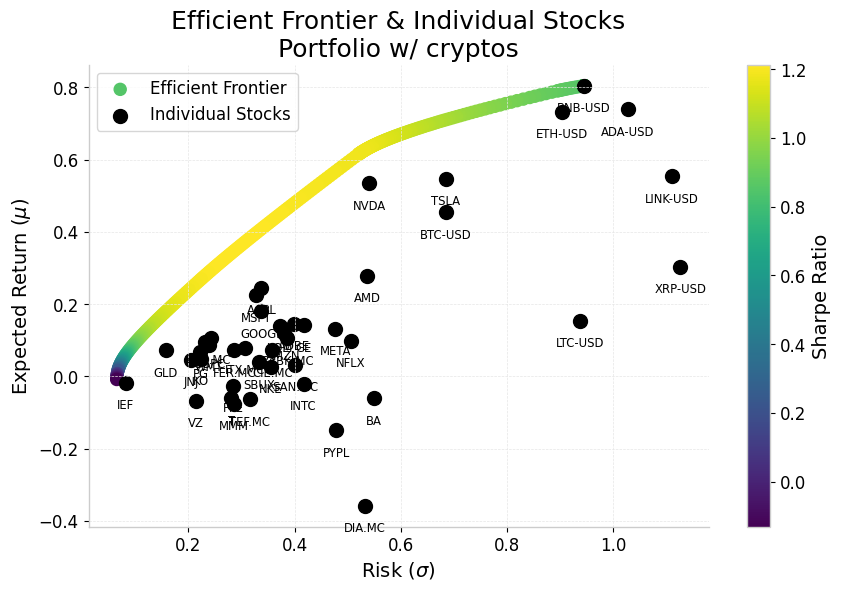

In [10]:
### Original Period
# start = '2018-01-01'
# end   = '2024-06-01'

# Apply data to the class
#              w/ ฿ [0]   w/o ฿ [1]
select_data = (all_data, nall_data)[0]
PO = PortfolioOptimization(select_data)

# Compute the efficient frontier df (Risk, Return, Sharpe Ratio)
#       & the weights matrix
frontier_df = PO.frontier_df
weights_mat = PO.weights_mat

# Efficient frontier
PO.plot_eff_frontier()

**Differents computations of weights**

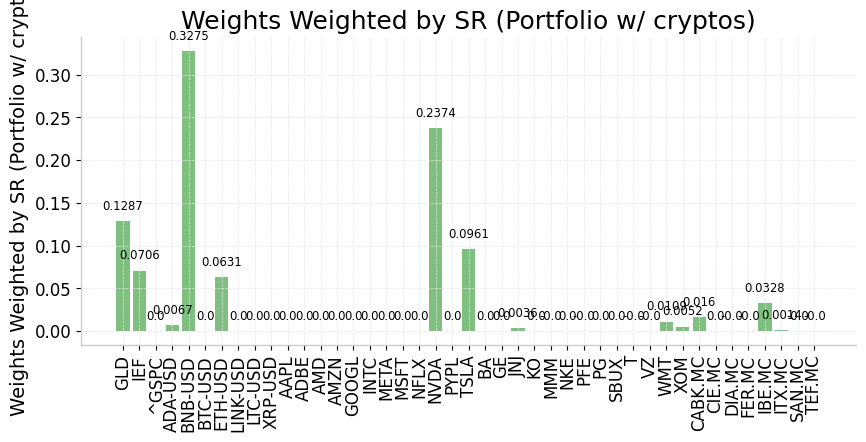

In [11]:
weights = PO.weighted_weights

# Portfolio weights
#PO.plot_hist(PO.mean_weights)
#PO.plot_hist(PO.max_SR_weights)
PO.plot_hist() # PO.weighted_weights as default w

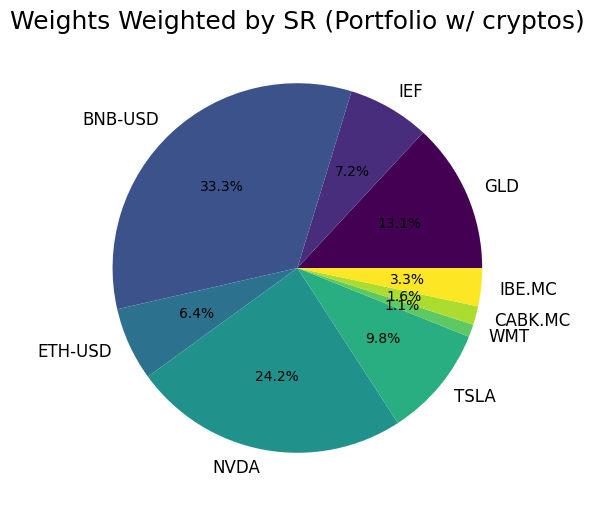

In [12]:
# Apply Threshold
weights_threshold = PO.thresholded_weights(threshold=0.01)
# Plot
PO.plot_pie(weights_threshold)

**Portfolio without cryptos**

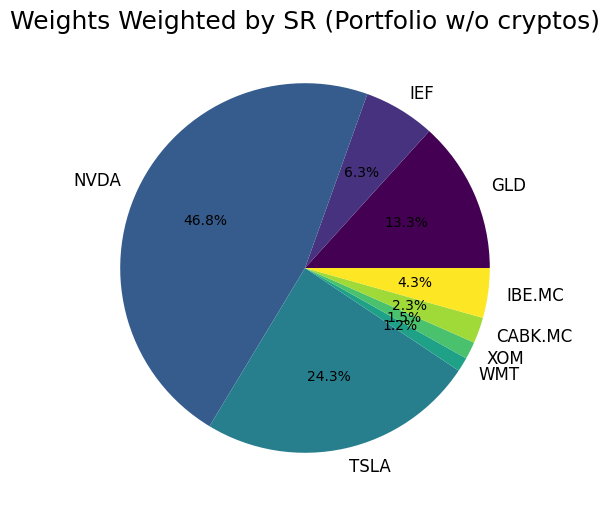

In [13]:
# Get weights (w/o cryptos)
PO_no_cryp = PortfolioOptimization(nall_data)
w_thres_no_cryp = PO_no_cryp.thresholded_weights(threshold=0.01)
PO_no_cryp.plot_pie(w_thres_no_cryp)

### 2.2 Evaluate Portfolio

**Prices for Computed weights (from jan24 to jun24)**

In [14]:
'''
PO = PortfolioOptimization(all_data)
weights_threshold = PO.thresholded_weights()

PO_no_cryp = PortfolioOptimization(nall_data)
w_thres_no_cryp = PO_no_cryp.thresholded_weights()
'''
# Portfolios' Relative Price Evolution
portfolio_price = PO.compute_portfolio_relative_price(all_future_data, weights_threshold)
portfolio_price_no_cryp = PO_no_cryp.compute_portfolio_relative_price(all_future_data, w_thres_no_cryp)

**Portfolios of equal weights**

In [15]:
# Normalized prices for traditional assets
future_trad_data
trad_price = future_trad_data / future_trad_data.iloc[0]

# Portfolios' Relative Prices with equal weights
crypto_price = EqualWeightPortfolio(future_crypto_data).price
tech_price = EqualWeightPortfolio(future_tech_data).price
vars_price = EqualWeightPortfolio(future_vars_data).price
ibex_price = EqualWeightPortfolio(future_ibex_data).price

categories_price = pd.concat(
    [crypto_price, tech_price, vars_price, ibex_price], axis=1)

**Plot Portfolio Relative Price**

Text(0.5, 1.0, "Portfolios' Relative Price Evolution")

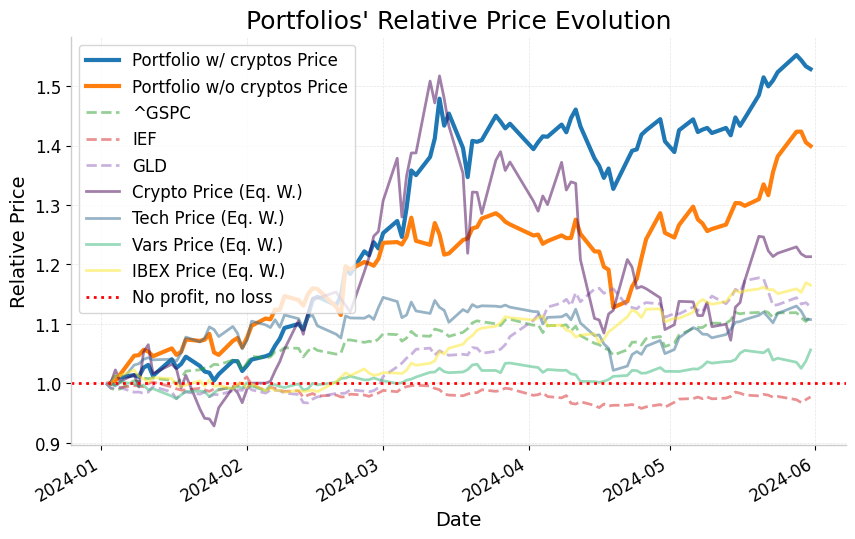

In [36]:
# Plot Portfolios' Relative Price Evolution
fig, ax = plt.subplots(1,1)
portfolio_price.plot(linewidth = 3, ax=ax)
portfolio_price_no_cryp.plot(linewidth = 3, ax=ax)
trad_price.plot(linestyle='--', alpha=0.5, ax=ax)
categories_price.plot(colormap='viridis', alpha=0.5, ax=ax)

plt.axhline(y=1, color='red', linestyle=':', label='No profit, no loss')
plt.legend()
plt.ylabel('Relative Price')
plt.title("Portfolios' Relative Price Evolution")

In [17]:
'''
mean = returns.mean();       var = returns.std()

results = pd.DataFrame({
    "Avg. LogRet": mean,
    "Volatility": var,
    "Sharpe Ratio": mean/var
})
results
'''

'\nmean = returns.mean();       var = returns.std()\n\nresults = pd.DataFrame({\n    "Avg. LogRet": mean,\n    "Volatility": var,\n    "Sharpe Ratio": mean/var\n})\nresults\n'

### 2.3. Different Time Period Implementation

In [18]:
portfolio_prices = pd.DataFrame({})

portfolio_prices['Jan20-Jan24 (w/) '] = portfolio_price
portfolio_prices['Jan20-Jan24 (w/o)'] = portfolio_price_no_cryp

**Year 2023**

In [19]:
all_data2 = Download(all_tickers, '2023-01-01', '2024-01-01')
all_data2.name = 'Year 2023 (w/)'
df_returns2 = LogRet(all_data2)

nall_data2 = all_data2.drop(columns=cryptos)
nall_data2.name = 'Year 2023 (w/o)'

[*********************100%%**********************]  43 of 43 completed


[*********************100%%**********************]  43 of 43 completed


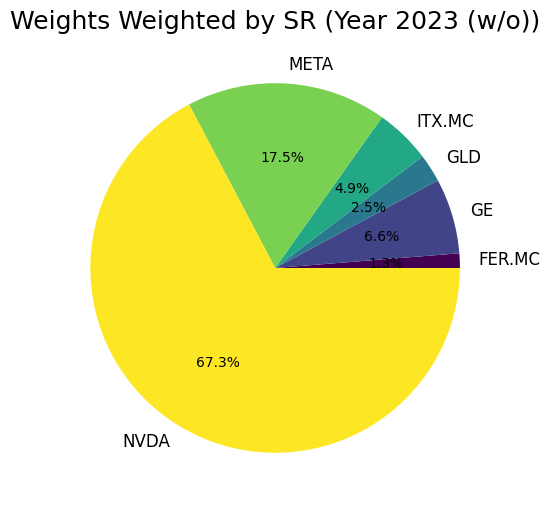

In [80]:
plotting= False

all_data2 = Download(all_tickers, '2023-01-01', '2024-01-01')
all_data2.name = 'Year 2023 (w/)'

nall_data2 = all_data2.drop(columns=cryptos)
nall_data2.name = 'Year 2023 (w/o)'

if plotting:
    df_returns2 = LogRet(all_data2)
    dist_mat2 = np.sqrt(2 * (1 - df_returns2.corr()))
    plot_hierarchical_tree(dist_mat2, 'Hierarchical Clustering Dendrogram')

PO2 = PortfolioOptimization(all_data2)
weights_threshold = PO2.thresholded_weights(threshold=0.01)

POn2 = PortfolioOptimization(nall_data2)
w_thres_no_cryp = POn2.thresholded_weights(threshold=0.01)

if plotting:
    PO2.plot_eff_frontier()
    #PO2.plot_hist() # w/ weighted_weights
    PO2.plot_pie(weights_threshold)
POn2.plot_pie(w_thres_no_cryp)


# Portfolios' Relative Price Evolution
portfolio_prices[all_data2.name] = PO2.compute_portfolio_relative_price(all_future_data, weights_threshold)
portfolio_prices[nall_data2.name] = POn2.compute_portfolio_relative_price(all_future_data, w_thres_no_cryp)

**December 2023**

[*********************100%%**********************]  43 of 43 completed


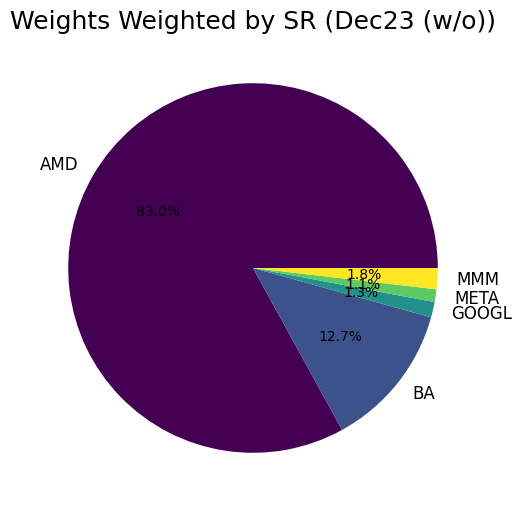

In [78]:
all_data3 = Download(all_tickers, '2023-12-01', '2024-01-01')
all_data3.name = 'Dec23 (w/)'

nall_data3 = all_data3.drop(columns=cryptos)
nall_data3.name = 'Dec23 (w/o)'

if plotting:
    df_returns3 = LogRet(all_data3)
    dist_mat2 = np.sqrt(2 * (1 - df_returns2.corr()))
    plot_hierarchical_tree(dist_mat2, 'Hierarchical Clustering Dendrogram')

PO3 = PortfolioOptimization(all_data3)
weights_threshold = PO3.thresholded_weights(threshold=0.01)

POn3 = PortfolioOptimization(nall_data3)
w_thres_no_cryp = POn3.thresholded_weights(threshold=0.01)

if plotting:
    PO3.plot_eff_frontier()
    #PO3.plot_hist() # w/ weighted_weights
    PO3.plot_pie(weights_threshold)
    POn3.plot_pie(w_thres_no_cryp)

weights_threshold = PO3.thresholded_weights(threshold=0.01)

# Portfolios' Relative Price Evolution
portfolio_prices[all_data3.name] = PO3.compute_portfolio_relative_price(all_future_data, weights_threshold)
portfolio_prices[nall_data3.name] = POn3.compute_portfolio_relative_price(all_future_data, w_thres_no_cryp)

<ipython-input-73-759433f67145>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio_prices_with[''] = 0
<ipython-input-73-759433f67145>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio_prices_without[''] = 0


Text(0.5, 1.0, "Portfolios' Relative Price Evolution")

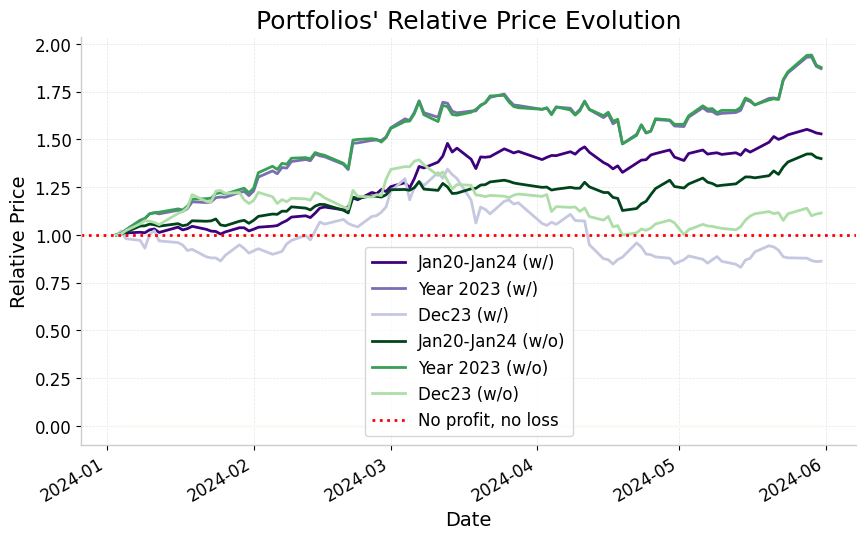

In [73]:
portfolio_prices

# Plot Portfolios' Relative Price Evolution
fig, ax = plt.subplots(1,1)

# Identify columns containing 'w/' and 'w/o'
columns_with = [col for col in portfolio_prices.columns if '(w/)' in col]
columns_without = [col for col in portfolio_prices.columns if '(w/o)' in col]

# Create separate DataFrames
portfolio_prices_with = portfolio_prices[columns_with]
portfolio_prices_with[''] = 0
portfolio_prices_without = portfolio_prices[columns_without]
portfolio_prices_without[''] = 0

# Plotting portfolios
portfolio_prices_with.plot(ax=ax, colormap='Purples_r')
portfolio_prices_without.plot(ax=ax, colormap='Greens_r')

plt.axhline(y=1, color='red', linestyle=':', label='No profit, no loss')
plt.legend()
plt.ylabel('Relative Price')
plt.title("Portfolios' Relative Price Evolution")

# Limitations? All that glitters is not gold

*   **Stationary Returns**

MPO assumes that the statistical properties of returns, **mean and variance**, are constant over time. However, financial markets are dynamic, and these properties change due to economic conditions.

*  **Risk Measures**

We have used standard deviation (volatility) as the measure of risk. Therefore, it does not distinguish between upside and **downside risk**. But investors are more concerned with downside risk, rather than up.

*   **Diversification Assumptions**

MPO assumes diversification always reduces risk. Nevertheless, has we have seen in the **forth notebook**, in times of market stress correlations between asset classes increase, reducing the benefits of diversification.

*   **Transaction Costs and Taxes**

Our PO does not account for transaction costs or taxes. This can result in unrealistic portfolio returns.



# Bibliography

*   Practical assignment 4 : Correlations
*   Practical assignment 5 : Portfolio Optimization

---

*   Cryptocurrencies, [yahoo finance](https://finance.yahoo.com/crypto/)
*   Technologies sector, [yahoo finance](https://finance.yahoo.com/sectors/technology/)
*   [Valores de la Bolsa española](https://www.expansion.com/mercados/cotizaciones/indices/ibex35_I.IB.html), [yahoo finance](https://es.finance.yahoo.com/mas-activos/)

---

*   Adams, J. (2021). What Are the Benefits, Cons, and Limitations of Modern Portfolio Theory? Available at: [realized1031.com](https://www.realized1031.com/blog/what-are-the-benefits-cons-and-limitations-of-modern-portfolio-theory), Disadvantages and Limitations.
*   Logue, A. (2023). Britannica Money. Available at: [britannica.com](https://www.britannica.com/money/modern-portfolio-theory-explained), Criticisms and limitations of MPT.